# Sales' report

## 📖 Introduction
Our company sells motorcycle parts by operating three warehouses in a large metropolitan area.
This notebook analysis the sales of our company from June to August of 2021. Namely we decompose the sales by warehouse, client type, product line, month, and payment method to discover some patterns. Then we dive deeper to find more insights.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## Importing some packages

In [12]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

## Loading the data

In [13]:
# Reading in the sales data
df = pd.read_csv('sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [14]:
# Let's add columns showing day of week, week, and month
dayOfWeek_dict={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

month_dict = {6: 'June', 7: 'July', 8: 'August'}

df['dayofweek'] = df['date'].dt.dayofweek.map(dayOfWeek_dict)
df['week'] = df['date'].dt.week
df['month'] = df['date'].dt.month.map(month_dict)
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,dayofweek,week,month
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,Tuesday,22,June
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,Tuesday,22,June
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,Tuesday,22,June
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,Tuesday,22,June
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,Tuesday,22,June


## Reporting

We'll start our report from general overview of sales by month, warehouse, client type, product line, and payment method.

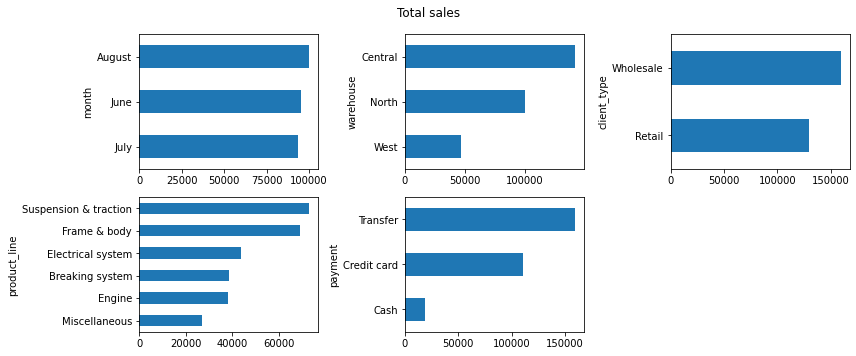

In [15]:
temp_list = ['month', 'warehouse', 'client_type', 'product_line', 'payment']
suplot_index = 0
fig = plt.figure(figsize=(12, 5))
for col in temp_list:
    suplot_index += 1
    temp_df = df.groupby(col)[['total']].sum().sort_values('total', ascending=True)
    temp_df.plot(kind='barh', ax=plt.subplot(2, 3, suplot_index), legend=False)
plt.suptitle('Total sales')
plt.tight_layout()

The plots above show that over June-August period:
1. total sales are almost the same for each month
2. central warehouse recorded the highest sales
3. sales to wholesale clients are more 
4. sales of suspension & traction and frame & body are the highest
5. highest sales are recorded with respect to transfer payment method.

<br>Later we try to understand what drives these observations. For now let's show average sales by month, warehouse, client type, product line, and payment method.

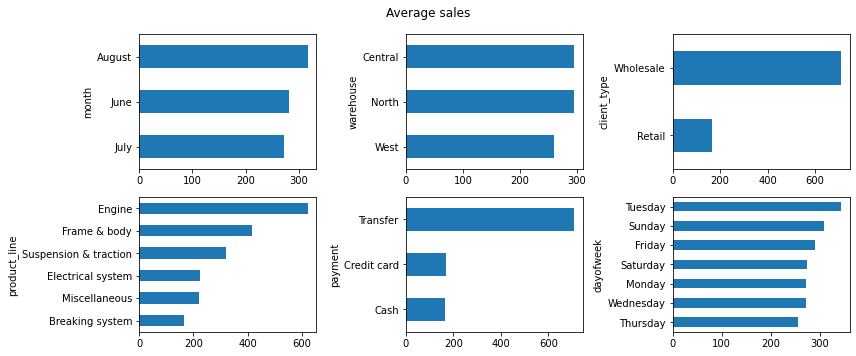

In [16]:
temp_list = ['month', 'warehouse', 'client_type', 'product_line', 'payment', 'dayofweek']
suplot_index = 0
fig = plt.figure(figsize=(12, 5))
for col in temp_list:
    suplot_index += 1
    temp_df = df.groupby(col)[['total']].mean().sort_values('total', ascending=True)
    temp_df.plot(kind='barh', ax=plt.subplot(2, 3, suplot_index), legend=False)
plt.suptitle('Average sales')
plt.tight_layout()

Well, average sales are higher in August. West warehouse has recorded the lowest average sales. Wholesale client's purchases are noticeably higher on average. Engines have the highest average sales. Average sales conducted via transfer payment are significantly higher. Tuesday's average sales are slighly higher compared to other week days. All of these insights are depicted in the plots above.
<br> Let's depict average prices and quantities to see whether these measures can provide some explanations regarding the facts summarized above.

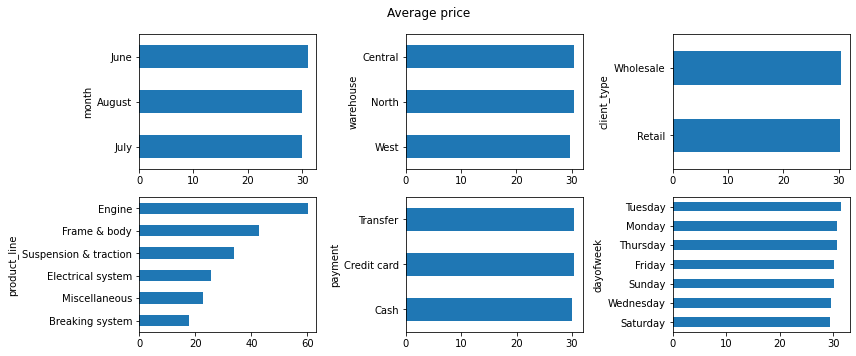

In [17]:
temp_list = ['month', 'warehouse', 'client_type', 'product_line', 'payment', 'dayofweek']
suplot_index = 0
fig = plt.figure(figsize=(12, 5))
for col in temp_list:
    suplot_index += 1
    temp_df = df.groupby(col)[['unit_price']].mean().sort_values('unit_price', ascending=True)
    temp_df.plot(kind='barh', ax=plt.subplot(2, 3, suplot_index), legend=False)
plt.suptitle('Average price')
plt.tight_layout()

The above plots show, that, in case of products, warehouses, and week days, average prices can be a driver for the results obtained regarding average sales. Let's depict average quantities to make things more clear.

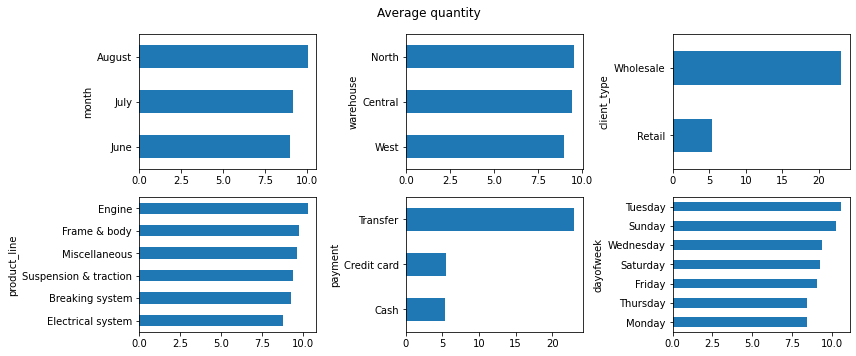

In [18]:
temp_list = ['month', 'warehouse', 'client_type', 'product_line', 'payment', 'dayofweek']
suplot_index = 0
fig = plt.figure(figsize=(12, 5))
for col in temp_list:
    suplot_index += 1
    temp_df = df.groupby(col)[['quantity']].mean().sort_values('quantity', ascending=True)
    temp_df.plot(kind='barh', ax=plt.subplot(2, 3, suplot_index), legend=False)
plt.suptitle('Average quantity')
plt.tight_layout()

Average quantities provide important infomation on average sales formation. Namely it seems that average sales by month, client, and payment method are mostly driven by average quantities. While for product, warehouses, and days of week the drivers can be both prices and quantities.

### Total sales decomposition for warehouses

In this section we'll decompose warehouses' sales by month, client type, product line and payment method in respective order.

In [19]:
def create_sublots(df, fig_size, title_txt):
    temp_list = list(set([i[0] for i in df.index]))
    suplot_index = 0
    fig = plt.figure(figsize=fig_size)
    for i_unit in temp_list:
        suplot_index += 1
        temp_df = df.loc[i_unit]
        if len(temp_list) > 3:
            temp_df.plot(kind='barh', ax=plt.subplot(2, 3, suplot_index), title=i_unit, legend=False)
        else:
            temp_df.plot(kind='barh', ax=plt.subplot(1, len(temp_list), suplot_index), title=i_unit, legend=False)
    plt.suptitle(title_txt)
    plt.tight_layout()

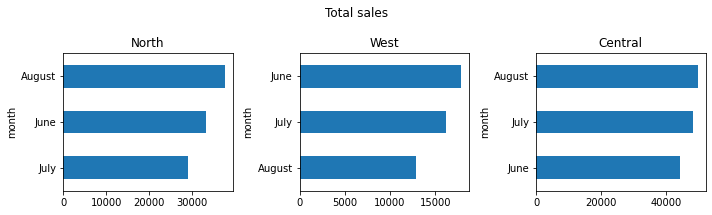

In [20]:
ts_warehouse_month = df.groupby(['warehouse', 'month'])[['total']].sum().sort_values('total', ascending=True)
#display(ts_warehouse_month)

create_sublots(df=ts_warehouse_month, fig_size=(10, 3), title_txt='Total sales')

As the plots above show only the west warehouse has recorded high sales in June. The other 2 have had high sales in August. Maybe this should be investigated further to get more useful insights. But that is not possible without additional infomation. Let's see how the warehouses behave in terms of client types.

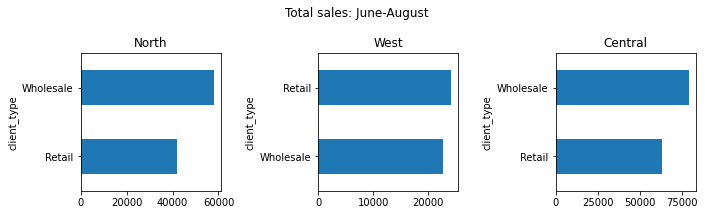

In [21]:
ts_warehouse_client = df.groupby(['warehouse', 'client_type'])[['total']].sum().sort_values('total', ascending=True)
#display(ts_warehouse_client)

create_sublots(df=ts_warehouse_client, fig_size=(10, 3), title_txt='Total sales: June-August')

The west warehouse shows reverse picture compared to the other 2, which show high sales to wholesale clients. Let's see what we can derive regarding product types.

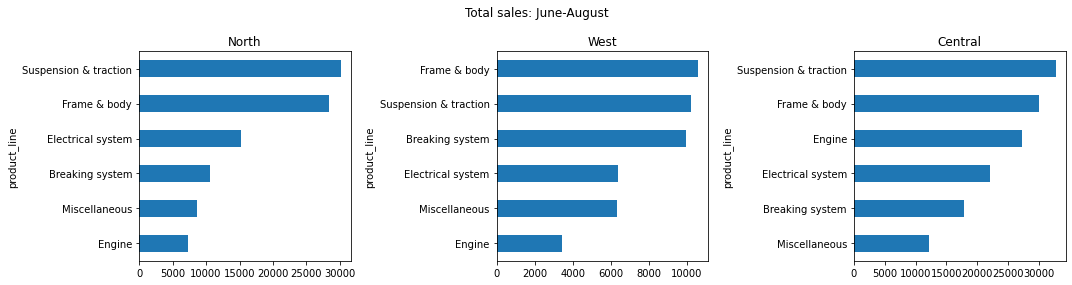

In [22]:
ts_warehouse_product = df.groupby(['warehouse', 'product_line'])[['total']].sum().sort_values('total', ascending=True)
create_sublots(df=ts_warehouse_product, fig_size=(15, 4), title_txt='Total sales: June-August')

Generally we can say that suspension & traction and frame & body generate higher sales for all of the warehouses. Though we see that there are some differences. Namely engine, electrical system, and breaking system are on the third place in generating sales for central, north, and west warehouses respectively. Finally let's investigate the payment methods.

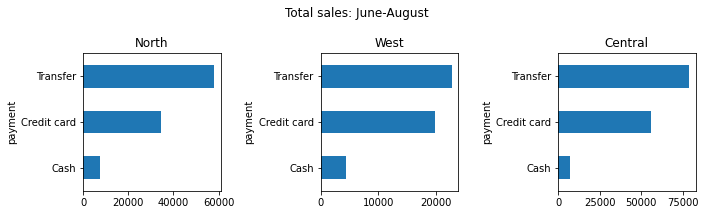

In [23]:
ts_warehouse_payment = df.groupby(['warehouse', 'payment'])[['total']].sum().sort_values('total', ascending=True)
create_sublots(df=ts_warehouse_payment, fig_size=(10, 3), title_txt='Total sales: June-August')

There is no difference among the warehouses in terms of total sales by payment method. Highest sales have recorded in case of transfer payment method. Sales generated by cash payment are noticeably low.

### Weekly seasonality

As we observed that on Tuesdays the sales are higher on average, let's dive deeper.

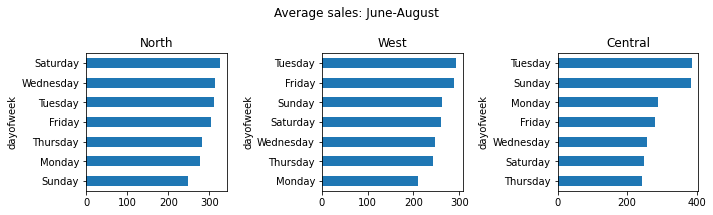

In [24]:
as_warehouse_dayofweek = df.groupby(['warehouse', 'dayofweek'])[['total']].mean().sort_values('total', ascending=True)
#display(ts_warehouse_month)

create_sublots(df=as_warehouse_dayofweek, fig_size=(10, 3), title_txt='Average sales: June-August')

The plots show that average sales are high on Tuesday only for central and west warehouses.

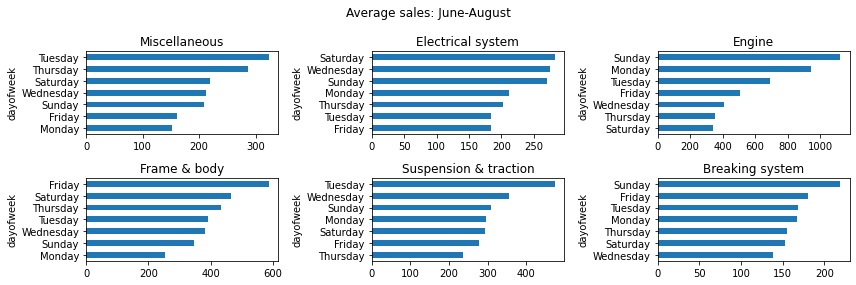

In [25]:
as_product_dayofweek = df.groupby(['product_line', 'dayofweek'])[['total']].mean().sort_values('total', ascending=True)
#display(ts_warehouse_month)

create_sublots(df=as_product_dayofweek, fig_size=(12, 4), title_txt='Average sales: June-August')

As the plots above visualize suspension & traction and miscellaneous have recorded higher average sales on Tuesday. Let's see whether this observation is stable across the warehouses.

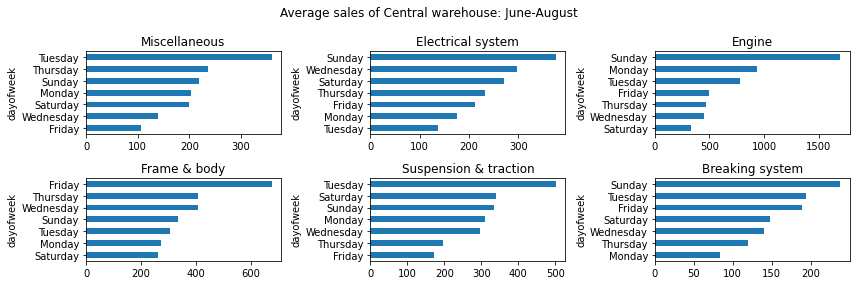

In [26]:
asc_product_dayofweek = df[df['warehouse']=='Central'].groupby(['product_line', 'dayofweek'])[['total']].mean().sort_values('total', ascending=True)
#display(ts_warehouse_month)

create_sublots(df=asc_product_dayofweek, fig_size=(12, 4), title_txt='Average sales of Central warehouse: June-August')

In case of central warehouse suspension & traction and miscellaneous have recorded higher average sales on Tuesday. The rest of products have higher sales either on Sunday or on Friday (see the plots above).

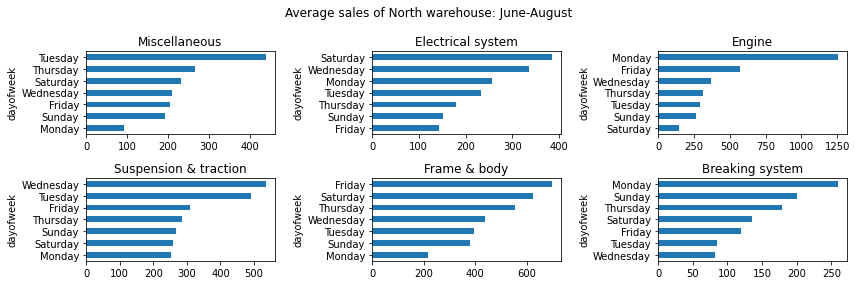

In [27]:
asn_product_dayofweek = df[df['warehouse']=='North'].groupby(['product_line', 'dayofweek'])[['total']].mean().sort_values('total', ascending=True)
#display(ts_warehouse_month)

create_sublots(df=asn_product_dayofweek, fig_size=(12, 4), title_txt='Average sales of North warehouse: June-August')

In case of north warehouse only miscellaneous has recorded higher average sales on Tuesday. The rest of products have higher sales on different days of a week in average terms(see the plots above).

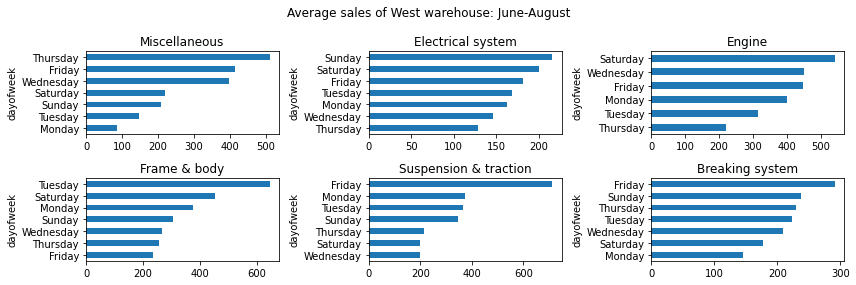

In [28]:
asw_product_dayofweek = df[df['warehouse']=='West'].groupby(['product_line', 'dayofweek'])[['total']].mean().sort_values('total', ascending=True)
#display(ts_warehouse_month)

create_sublots(df=asw_product_dayofweek, fig_size=(12, 4), title_txt='Average sales of West warehouse: June-August')

In case of west warehouse only frame & body has recorded higher average sales on Tuesday. The rest of products have higher sales on Sunday, Friday, Saturday, and Thursday (see the plots above).

### Monthly sales decomposition by product

The decomposition is shown below. It seems there is no difference. Namely suspension & traction and frame & body generating higher sales compared to the other products.

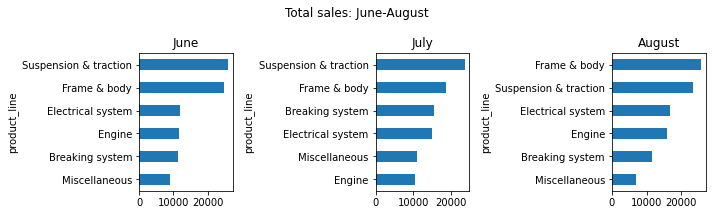

In [29]:
ts_month_product = df.groupby(['month', 'product_line'])[['total']].sum().sort_values('total', ascending=True)

create_sublots(df=ts_month_product, fig_size=(10, 3), title_txt='Total sales: June-August')

Though suspension & traction and frame & body generate higher sales, the average sales show that engine sales are higher (see that the plots below). Judging by average prices and quantities the previous fact can be explained mostly by prices. Though in case of August sales quantity have some impact too.

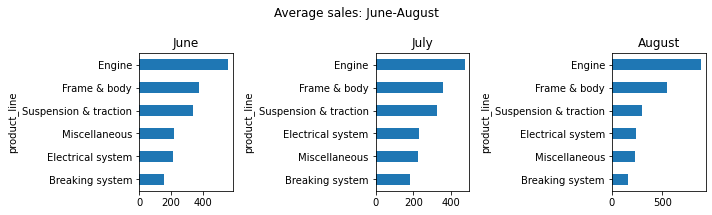

In [30]:
as_month_product = df.groupby(['month', 'product_line'])[['total']].mean().sort_values('total', ascending=True)

create_sublots(df=as_month_product, fig_size=(10, 3), title_txt='Average sales: June-August')

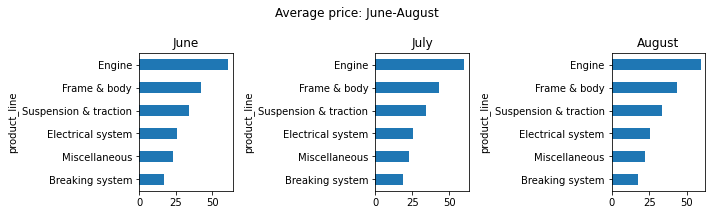

In [31]:
up_month_product = df.groupby(['month', 'product_line'])[['unit_price']].mean().sort_values('unit_price', ascending=True)

create_sublots(df=up_month_product, fig_size=(10, 3), title_txt='Average price: June-August')

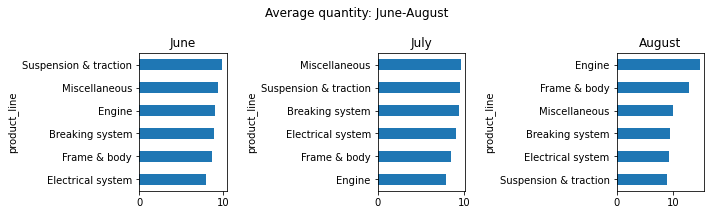

In [32]:
q_month_product = df.groupby(['month', 'product_line'])[['quantity']].mean().sort_values('quantity', ascending=True)

create_sublots(df=q_month_product, fig_size=(10, 3), title_txt='Average quantity: June-August')

### Sales decomposition by clients and more

As the plots below show, suspension & traction and frame & body are the leaders of total sales with respect to clients too. Moreover engines' sales are higher on average which can be explained mostly by prices as the plots of the average measures show (see below). Though quantity have some impact too.

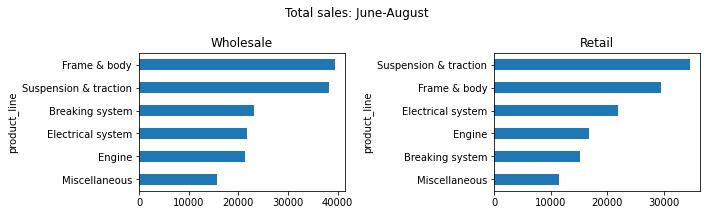

In [33]:
ts_client_product = df.groupby(['client_type', 'product_line'])[['total']].sum().sort_values('total', ascending=True)

create_sublots(df=ts_client_product, fig_size=(10, 3), title_txt='Total sales: June-August')

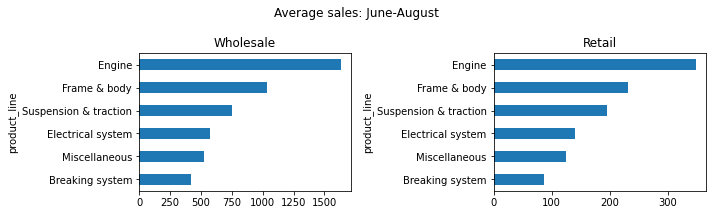

In [34]:
as_client_product = df.groupby(['client_type', 'product_line'])[['total']].mean().sort_values('total', ascending=True)

create_sublots(df=as_client_product, fig_size=(10, 3), title_txt='Average sales: June-August')

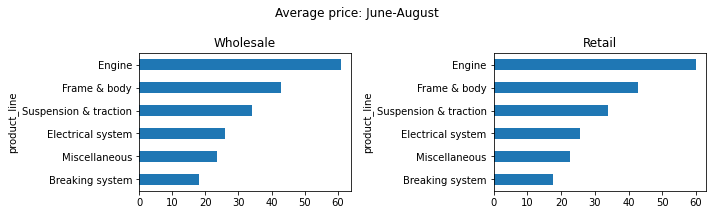

In [35]:
up_client_product  = df.groupby(['client_type', 'product_line'])[['unit_price']].mean().sort_values('unit_price', ascending=True)

create_sublots(df=up_client_product, fig_size=(10, 3), title_txt='Average price: June-August')

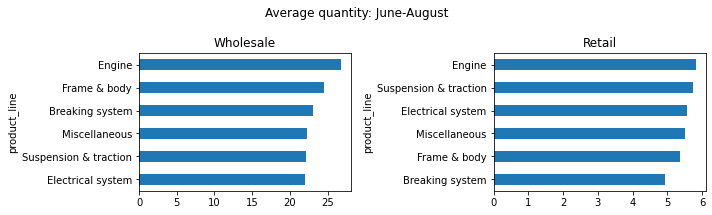

In [36]:
q_client_product = df.groupby(['client_type', 'product_line'])[['quantity']].mean().sort_values('quantity', ascending=True)

create_sublots(df=q_client_product, fig_size=(10, 3), title_txt='Average quantity: June-August')

### Sales decomposition by payment method and more

Judging by the plots of this section there is nothing uncommon in case of decomposition by payment method. Again suspension & traction and frame & body lead the total sales generation process. In addition as in other decomposition cases engines' sales are noticeably higher on average. This fact can be mostly driven by prices as the average measures' plots depict. Though quantity have some impact too.

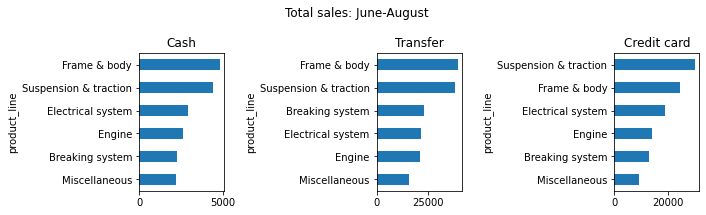

In [37]:
ts_payment_product = df.groupby(['payment', 'product_line'])[['total']].sum().sort_values('total', ascending=True)

create_sublots(df=ts_payment_product, fig_size=(10, 3), title_txt='Total sales: June-August')

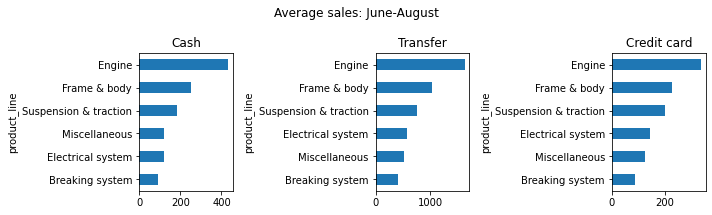

In [38]:
as_payment_product = df.groupby(['payment', 'product_line'])[['total']].mean().sort_values('total', ascending=True)

create_sublots(df=as_payment_product, fig_size=(10, 3), title_txt='Average sales: June-August')

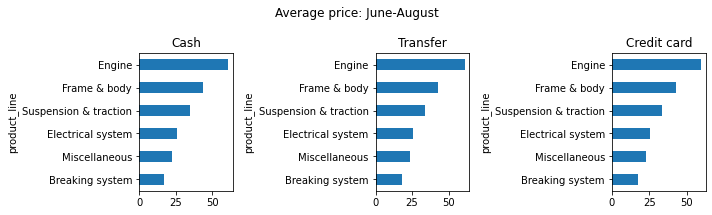

In [39]:
up_payment_product  = df.groupby(['payment', 'product_line'])[['unit_price']].mean().sort_values('unit_price', ascending=True)

create_sublots(df=up_payment_product, fig_size=(10, 3), title_txt='Average price: June-August')

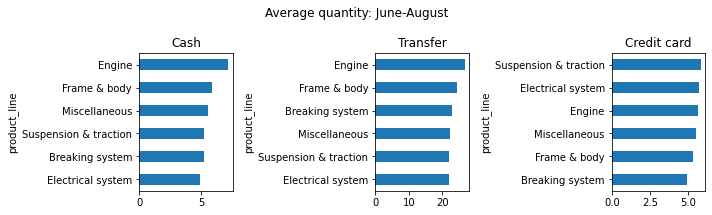

In [40]:
q_payment_product = df.groupby(['payment', 'product_line'])[['quantity']].mean().sort_values('quantity', ascending=True)

create_sublots(df=q_payment_product, fig_size=(10, 3), title_txt='Average quantity: June-August')

## Summary

Generally over June-August period:
1. total sales are almost the same for each month
2. central warehouse recorded the highest sales
3. sales to wholesale clients are more than to retail clients
4. sales of suspension & traction and frame & body are the highest compared to the other product lines
5. highest sales are recorded with respect to transfer payment method.

<br>Despite the aforementioned points/facts the average sales show a slightly different behaviour. Namely over June-August period:
1. average sales are higher in August
2. the west warehouse has recorded the lowest average sales
3. wholesale client's purchases are noticeably higher on average
4. engine product line has the highest average sales
5. average sales conducted via transfer payment are significantly higher 
6. Tuesday's average sales are slighly higher compared to other week days
7. average sales by month, client, and payment method are mostly driven by average quantities
8. drivers of average sales by product, warehouses, and days of week can be both prices and quantities.

<br> More granular analysis shows that:
1. the west warehouse has recorded high total sales in June as opposed to the other warehouses which have had high sales in August
2. the central and north warehouses show high sales to wholesale clients as opposed to the west warehouse
3. suspension & traction and frame & body product lines generate higher sales for all of the warehouses: this is true in case of sales decomposition by month, client, and payment method too
4. for all warehouses highest sales have recorded in case of transfer payment method as opposed to sales generated by cash payment which are noticeably low.
5. Tuesday's higher sales on average are driven by the central and the west warehouses: on product side suspension & traction and miscellaneous have recorded higher average sales on Tuesday (more deep analysis show that this is mostly driven by the central warehouse's suspension & traction and miscellaneous sales).